## I. Introduction

In this final lesson, we will introduce the basics of machine learning!

We will take a look at the machine learning approach to predictive analytics, discuss the various types of machine learning models, then dive deeper into the components of a supervised machine learning model.

### What is predictive analytics?
Predictive analytics is the use of data combined with techniques from mathematics, statistics, and computer science to make predictions about unknown events. The goal of predictive analytics is to produce a good assessment of what could happen regarding unknown events.

The use of predictive analysis has increased drastically in recent years. There are two reasons for this:

Technological advancements have given us the means to perform such analysis.
It is extremely effective, accurate, and works well.
What is machine learning?
There are many ways to perform predictive analytics, but one of the most successful tools for doing predictive analytics is machine learning.

Machine learning is a sub-field of computer science. It can be simply described as giving a computer the ability to learn without it being explicitly programmed. The field of machine learning has developed many methods to teach computers to perform certain tasks using data, including predictive analytics.

It is essential to understand the types of problems one might face when using machine learning. We can separate these learning problems into two broad categories – supervised and unsupervised learning.

### Supervised learning
In supervised learning, we have variables that can be divided into **input** variables (also commonly known as **features**) and **output** variable (also commonly known as the **target**). The goal is to find an algorithm that learns the relationship between inputs and outputs so that when it is given new inputs, it can predict outputs.

Let's consider an example from the student.csv dataset used in the previous lesson. The following screenshot shows the first five rows (using .head()):

![Sample](sample.png)


If we define one of these variables as the target (say, G3: final grade), and the rest of the variables as the features, then we can use supervised learning to use the features to try to predict a student’s final grade.

Supervised learning problems can be further divided into regression and classification problems. **If the target variable is categorical in nature, then it is a classification problem. If the target variable is numerical, then it is a regression problem.**

### Unsupervised learning
In unsupervised learning, we only have input variables. The goal is to find the underlying structure or distribution to draw inferences. We will not be covering unsupervised learning since the purpose of this lesson is to provide a high level understanding of machine learning and the majority of practical machine learning is supervised.

Now that we’ve defined some terms, open up the notebook scikit-learn notebook.ipynb and let’s get started!

## II. k - nearest neighbors

Throughout this lesson we will be using the scikit-learn library in Python to implement predictive models. First, we will introduce the library, then build a classification model with the iris dataset. Building a classification model with iris is the Hello, world! of machine learning.

scikit-learn is the most popular Python library for doing machine learning. It provides a simple and efficient API with tools for data modeling and data analysis. It is built on top of `NumPy`, `SciPy`, and `matplotlib`. We generally do not import the entire library; instead we import only what we need from it.

Let’s first import the datasets object, which allows us to load all the datasets that scikit-learn provides, including iris.

In [1]:
import warnings
warnings.filterwarnings('ignore')
%autosave 5

Autosaving every 5 seconds


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from IPython.display import Latex

%matplotlib inline

# Import iris data
iris = datasets.load_iris()

`load_iris()` returns a dictionary-like object – you can find out more here. We will create a pandas DataFrame to store our data:

In [3]:
# Create dataframe to store iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This dataset consists of 50 samples from each of the three species of Iris flowers – 150 observations in total. Each observation has four measurements: `sepal length`, `sepal width`, `petal length`, and `petal width`. The species of Iris (`setosa`, `versicolor`, or `virginica`) is our target that we will try to predict from the four measurements.

The main API that is implemented in `scikit-learn` is that of the estimator. An estimator object is an object that contains the model that we can use to learn from the data. We will be using the k-Nearest-Neighbors (kNN) model. This model essentially finds the *k* most similar observations to an “unseen” observation to give a prediction.

Since this is a high-level introduction to machine learning, we will be treating models used in this lesson as black boxes – we will not be discussing in detail how these models work behind the scenes, but simply how to implement them.

First, let’s import the estimator, then create an instance of this object called the `flower_classifier`:

In [4]:
# Import estimator
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)   # setting random seed for reproducibility

# Create an instance of the estimator
flower_classifier = KNeighborsClassifier(n_neighbors=3)

Here, we provide hyperparameters to the object. The `scikit-learn` documentation provides details about the default hyperparameters and how to change them.

After this, we use the data that we have to train the estimator – i.e. we will pass in our data so that the model can learn from it. To do this, we use the `fit` method of our estimator object. We pass our features `iris.data` as `X` and our target `iris.target` as `y`:

In [5]:
# Train our model
flower_classifier.fit(X=iris.data, y=iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Now that our model is trained, we can use it to make predictions!

Say we found two *iris* flowers and want to know what species they are. We have measured their sepal and petal lengths and widths. Let’s store them in two-dimensional `NumPy` arrays:

In [6]:
# Store measurements of new flowers in two-dimensional arrays
new_flower1 = np.array([[5.1, 3.0, 1.1, 0.5]])
new_flower2 = np.array([[6.0, 2.9, 4.5, 1.1]])

To predict the species of these flowers, we pass the `new flower` into predict. The output will be an array with the predicted class label – 0 corresponds to the species `setosa`, 1 corresponds to `versicolor`, and 2 corresponds to `virginica`.

In [7]:
# Make predictions
new_flower_pred1 = flower_classifier.predict(new_flower1)
new_flower_pred2 = flower_classifier.predict(new_flower2)

print(f'Predicted species of new_flower1: {new_flower_pred1}')
print(f'Predicted species of new_flower2: {new_flower_pred2}')

Predicted species of new_flower1: [0]
Predicted species of new_flower2: [1]


We get an output of  `0` and `1` – therefore, our model has predicted that our first new flower is a `setosa` and our second new flower is a `versicolor`!

We can also pass n two-dimensional `NumPy` arrays into predict to make multiple predictions at one – let’s try this with two more new flowers:



In [8]:
# Make more predictions
new_flowers = np.array([[5.5, 2.1, 2.0, 0.9],
                        [7.2, 3.8, 9.0, 1.9]])

new_flowers_pred = flower_classifier.predict(new_flowers)

print(f'Predicted species of new flowers: {new_flowers_pred}')

Predicted species of new flowers: [0 2]


Our new flowers are `setosa` and `virginica`!

**TASK**

You have just collected five new iris flowers and want to know what species of iris they are. You have measured them and their sepal lengths, sepal widths, petal lengths, and petal widths are as follows:

1. *4.4, 2.3, 4.66, 0.25*
2. *9.47, 8.01, 1.18, 5.38*
3. *5.43, 3.01, 6.3, 0.25*
4. *6.6, 2.67, 4.61, 0.29*
4. *12.85, 3.08, 3.61, 1.56*

Using these measurements, predict their species.

In [9]:
# TASK --- Predict species of new flowers

my_flowers = np.array([[4.4, 2.3, 4.66, 0.25],
                       [9.47, 8.01, 1.18, 5.38],
                       [5.43, 3.01, 6.3, 0.25],
                       [6.6, 2.67, 4.61, 0.29],
                       [12.85, 3.08, 3.61, 1.56]])

my_flowers_prediction = flower_classifier.predict(my_flowers)
                       
print(f'Predicted species of new flowers: {my_flowers_prediction}')

Predicted species of new flowers: [1 0 2 1 2]


The new flowers are `versicolor`, `setosa`, `virginica`, `versicolor`, and `virginica`.

## III. Logistic regresion


In the previous step, we created a kNN classification model using `scikit-learn`. Now, we will train a logistic regression model and take a look at how to evaluate models. We will be using the `student.csv` dataset from the previous lesson.

**Logistic regression** can be used for classification when the target variable is binary – i.e. when there are only two possible outcomes. Essentially, it learns from training data to decide whether to class an input as `0` or `1` , where `0` and `1` are our two possible outcomes.

Let’s first load our dataset (note that the `alc` variable storing the weighted average of alcohol consumption has already been created for you):

In [10]:
# Import data
data = pd.read_csv('student_alc.csv')

# Show first five rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Low


Our goal is to use the features of the students to predict the level of alcohol consumption, `Low` or `High`. We will use the following features:

- `sex`: student's sex (binary: `'F'` as female or `'M'` as male)
- `famsize`: family size (binary: `'LE3'` as less or equal to 3 or `'GT3'` as greater than 3)
- `age`: student's age (numeric: from `15` to `22`)
- `studytime`: weekly study time (numeric: 1 <2 hours, `2` 2-5 hours, `3` 5-10 hours, or `4` >10 hours)
- `famrel`: quality of family relationships (numeric: from `1` very bad to `5` excellent)
- `goout`: going out with friends (numeric: from `1` very low to `5` very high)
- `freetime`: free time after school (numeric: from `1` very low to `5` very high)
- `G3`: final grade (numeric: from `0` to `20`)

Let’s store these variable names in `features` and `target`:



In [11]:
# Store features and target variables as list
features = ['sex', 'famsize', 'age', 'studytime', 'famrel', 'goout', 'freetime', 'G3']
target = 'alc'

The `scikit-learn` library only understands numbers. This makes it important to convert variables that are not numeric in nature into numeric values. This is known as **one-hot encoding**.

To one-hot encode our categorical variable, `sex`, we will map females to `0` and the males to `1`. For variable `famsize`, we will map `LE3` to `0`, and `GT3` to `1`. Finally for variable `alc`, we will map `Low` to `0` and `High` to `1`.

In [12]:
# One-hot encode categorical variables
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['famsize'] = data['famsize'].map({'LE3': 0, 'GT3': 1})
data['alc'] = data['alc'].map({'Low': 0, 'High': 1})

We then save the values of the features and target variables into objects `X` and `y` respectively:

In [13]:
# Save feature and target values into X and y
X = data[features].values
y = data[target].values

Before we begin to build our model, let’s get a benchmark that we can use to compare how accurate the models we build are.



In [14]:
# Calculate a benchmark
data['alc'].value_counts(normalize=True)

0    0.744222
1    0.255778
Name: alc, dtype: float64

This shows that about 74% of students reported a low level of alcohol consumption. Thus, a simple model that predicts `Low` for every single case will still correctly classify 74% of them...let’s try to build a model that can predict better than that!

We first will import the model `LogisticRegression`, create an instance of this object, and then train the model with our data, just as we did in the previous step:

In [15]:
# Import necessary model
from sklearn.linear_model import LogisticRegression
np.random.seed(0)   # setting random seed for reproducibility

# Create instance of Logistic Regression object
student_classifier_logreg = LogisticRegression(C=2, solver='liblinear')

# Train logistic regression model
student_classifier_logreg.fit(X, y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Again, we will not discuss the hyperparameters of this model – to learn more, you can read the documentation here.

We can now use this model to make predictions using `predict()` as before.

In [16]:
# Store predictions in new column in DataFrame
data['predictions_logreg'] = student_classifier_logreg.predict(X)

# Create confusion matrix
conf_matrix = pd.crosstab(data['predictions_logreg'], data['alc'])
conf_matrix

alc,0,1
predictions_logreg,,
0,453,105
1,30,61


In the above snippet, we stored our model’s predictions in a new column in our `DataFrame` called `predictions_logreg`. We then tabulated these predictions with the actual observations and to build a confusion matrix. We can use this confusion matrix to evaluate the predictions of this model thoroughly.

The diagonal of the matrix depicts the number of cases where the classifier made a correct prediction – i.e. when alcohol consumption level was `low` (`0`), our model correctly predicted 0 in 453 cases but incorrectly predicted 1 in 30 cases. Similarly when alcohol consumption level was `high` (`1`), our model correctly predicted 1 in 61 cases but incorrectly predicted 0 in 105 cases.

We can use these numbers to calculate the accuracy of our model. This is simply the fraction of correct predictions that were produced by the model (453 + 61 out of the total 649 cases):

In [17]:
# Calculate accuracy from confusion matrix
accuracy = (conf_matrix.iloc[0, 0] + conf_matrix.iloc[1, 1]) / data.shape[0]

print(f"The model's accuracy was {(accuracy * 100):.4f}%")

The model's accuracy was 79.1988%


Compare this value with the accuracy of our simple model that predicts `0` for all cases (i.e. our benchmark).

Unfortunately, our model is not much better than the benchmark…79% is not much higher than 74%. The reason for this could be that the logistic regression model is itself a rather simple model. Let’s try something a little more complex – a random forest classifier!

## IV. Random forests

To try and improve our predictions of student alcohol consumption levels, we will train a more complex **Random Forest model**.

The idea of a Random Forest is to combine many decision trees. In a classification problem, each individual decision tree in the Random Forest decides (“votes”) which class to classify an input as, and the forest chooses the classification with the most “votes”.

We use `RandomForestClassifier` in `scikit-learn` to create a Random Forest classifier. See if you can create this model on your own – it is the same process as what we did to create a kNN model and a logistic regression model.

In [18]:
# Import RandomForestClassifier object
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)   # setting random seed for reproducibility

In [19]:
# TASK --- Create instance of object and train random forest model
student_classifier_rf = RandomForestClassifier()

student_classifier_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now, let’s calculate predictions from our model and build a new confusion matrix:

In [20]:
# Store predictions in new column in DataFrame
data['predictions_rf'] = student_classifier_rf.predict(X)

# Create confusion matrix
conf_matrix = pd.crosstab(data['predictions_rf'], data['alc'])
conf_matrix

alc,0,1
predictions_rf,,
0,481,16
1,2,150


In [21]:
# TASK --- Calculate accuracy
rf_accuracy = (conf_matrix.iloc[0, 0] + conf_matrix.iloc[1, 1]) / data.shape[0]

print(f"The model's accuracy was {(rf_accuracy * 100):.4f}%")

The model's accuracy was 97.2265%


We achieve an extremely high accuracy! Be wary though, complex models such as Random Forest are often prone to **overfitting**. Overfitting is when a model learns the relationship between features and targets in the training data extremely well, but this doesn’t generalize to unseen data.

The problem of overfitting can be handled by tuning parameters, which beyond the scope of this course.

Let’s now use our Random Forest model to make predictions about unseen data. Assume we have a new student with various features. The student is a male with a large family and is 18 years of age. He studies for 2 hours per week, his family relations are not very good, he goes out a lot, has very high amounts of free time, and his final grade was 10.

To find out the level of alcohol he consumes, we can simply create a two-dimensional array containing these values and pass it into `predict()`. Let's create a function that decodes our prediction (remember that predict returns an integer 0 or 1):




In [22]:
# Features: [gender, famsize, age, studytime, famrel, goout, freetime, G3]
new_student1 = np.array([[1, 1, 18, 2, 1, 5, 5, 10]])

# Make prediction
new_student1_pred = student_classifier_rf.predict(new_student1)

# Decode prediction
def decode(prediction):
    """
    Return 'High' if prediction is '1'
    Return 'Low' if prediction is '0'.
    """
    if prediction == 1:
        return('High')
    else:
        return('Low')

decode(new_student1_pred)

'High'

By calling this function, we can see that the model predicts that the student belongs to the `High` alcohol consumption group.

Two more students have joined the school. Their features have been stored in `NumPy` arrays `new_student2` and `new_student3`.

In [23]:
# New students!
new_student2 = np.array([[0, 1, 19, 5, 5, 1, 1, 18]])
new_student3 = np.array([[1, 0, 17, 2, 0, 3, 1, 8]])

See if you can predict what their levels of alcohol consumption are!



In [24]:
# TASK --- Predictions alcohol consumption level for new_student2
new_student2_pred = student_classifier_rf.predict(new_student2)

decode(new_student2_pred)


'Low'

In [25]:
# TASK --- Predictions alcohol consumption level for new_student3
new_student3_pred = student_classifier_rf.predict(new_student3)

decode(new_student3_pred)

'High'

## V. Linear regresion

So far we have only built classifcation models. The final model we will discuss in this lesson is a regression model called **linear regression model**. We will be using the Ames housing dataset that we explored in the “Exploratory Data Analysis with `seaborn`” lesson.

Linear regression is used for finding a linear relationship between `features` and `targets`. Based on our exploratory analysis in the previous lesson we will use the features `CentralAir`, `LotArea`, `OverallQual`, `OverallCond`, `1stFlrSF`, `2ndFlrSF`, `BedroomAbvGr`, `Age`, and `Neighborhood` to try to predict the price of the house `SalePrice`.

Let’s import our data and create the `'Age'` variable as we did previously:

In [26]:
# Import data
housing = pd.read_csv('house.csv')

# Create 'Age' variable as in 'EDA with `seaborn`' lesson
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

# Show first five rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


As observed during EDA, there are a number of neighborhoods in this dataset that contain very few observations. This could have a negative impact on the accuracy of our model, so let’s remove these observations:

In [27]:
# Remove neighborhoods with less than 30 observations
counts = housing['Neighborhood'].value_counts()
housing = housing.loc[housing['Neighborhood'].isin(counts[counts > 30].index)]

housing.shape

(1310, 82)

This snippet stores the counts for each neighborhood in `counts`, then filters the `housing` dataset for those neighborhoods with over 30 observations. We now have 1310 observations, down from 1460.

Now let’s store our feature variables and target variables in `features` and `target`:

In [28]:
# Store feature and target variables
features = ['CentralAir', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'Age']
target = 'SalePrice'

The two features `Neighborhood` and `CentralAir` are not numeric in nature, thus, they need to be transformed into numerical variables. Let’s start with `CentralAir`

In [29]:
# One-hot encode CentralAir
housing['CentralAir'] = housing['CentralAir'].map({'N':0, 'Y':1})

This maps `N` to `0` and `Y` to `1` using the same method we used for the previous dataset. This is a simple method for when there are only two categories and you can manually map them to `0` and `1`. However, there are 16 different neighborhoods represented in our dataset… we don’t want to map them from 0 to 15, because this will put more weight on the `Neighborhood` variable for houses in the 16th neighborhood!

Instead, we will use the `pandas` method `get_dummies`. This creates a new variable, called a dummy variable, for each category – i.e. passing the `Neighborhood` variable into `get_dummies` will create 16 new variables named after each neighborhood. If an observation belongs to a particular neighborhood, say `CollgCr`, the value for `CollgCr` is `1` and `0` for every other neighborhood-variable.

In [30]:
# One-hot encode Neighborhood
dummies_nb = pd.get_dummies(housing['Neighborhood'])
dummies_nb.head()

,BrkSide,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Let’s compare the output of this to our original data.

In [31]:
# Compare dummy variables to original neighborhood data
housing['Neighborhood'].head()

0    CollgCr
2    CollgCr
3    Crawfor
4    NoRidge
5    Mitchel
Name: Neighborhood, dtype: object

The first five houses in our dataset belong to the neighborhoods `CollgCr`, `CollgCr`, `Crawfor`, `NoRidge`, and `Mitchel` respectively. The first five rows of our dummy dataset `dummies_nb` shows that the first house has a 1 in the `CollgCr` column, as does the second house. The third house has a 1 in `Crawfor`, and so on.

Great! We’ve now transformed our `Neighborhood` variable into a numerical variable. Let’s join this back to our original dataset, and add these dummy variables to our list of features:

In [32]:
# Join dummy variables to original dataset
housing = pd.concat([housing, dummies_nb], axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0


In [33]:
# Add dummy variables to feature list
features += list(dummies_nb.columns)
features

['CentralAir',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'Age',
 'BrkSide',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'Mitchel',
 'NAmes',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'Timber']

Now let’s create objects that contain our `features`, `target`, and the number of observations:

In [34]:
# Store features, target, and number of observations
X = housing[features].values
y = housing[target].values
n = housing.shape[0]

As we did in the previous steps, we need to calculate a benchmark to compare our model. For a regression model, the simplest possible model just predicts the average:

In [35]:
# Calculate mean sale price for benchmark
y_mean = np.mean(y)
y_mean

180167.63358778626

The average for our target variable is $180,167. For the model evaluation, we will use the evaluation metric called the **root-mean-square error (RMSE)**, which is given by

$$RMSE = \sqrt{\frac{\Sigma(obs - pred)^{2}}{n}}$$

It compares the observed values with the predicted values. The closer the observed and the predicted values are, the smaller the metric. We want the smallest metric possible.

Let’s calculate the `RMSE` for our benchmark model:

In [44]:
# Calculate benchmark RMSE
RMSE_benchmark = np.sqrt(np.sum((y - y_mean)**2) / n)
RMSE_benchmark

78032.94485454109

We get an `RMSE` of $78,033. Let’s see if we can build a regession model that performs better than this!

The way to build a linear regression model in `scikit-learn` is exactly the same as our previous models. We import the object, create an instance of it, then train the model and make predictions.

In [45]:
# Build linear regression model
from sklearn.linear_model import LinearRegression
np.random.seed(0)   # setting random seed for reproducibility

lr = LinearRegression()
lr.fit(X, y)

# Make predictions
housing['predictions'] = lr.predict(X)
y_pred = housing['predictions'].values

Now let’s calculate the RMSE of the model

In [46]:
# Calculate RMSE for linear regression model
RMSE_lr = np.sqrt(np.sum((y - y_pred)**2) / n)
RMSE_lr

33729.21817336611

This is significantly lower in comparison to our benchmark model!

To get a better understanding of our model’s predictions, let’s visualize and compare the `y_pred` to the real `SalePrice` of the houses. We can create a scatter plot to do this:

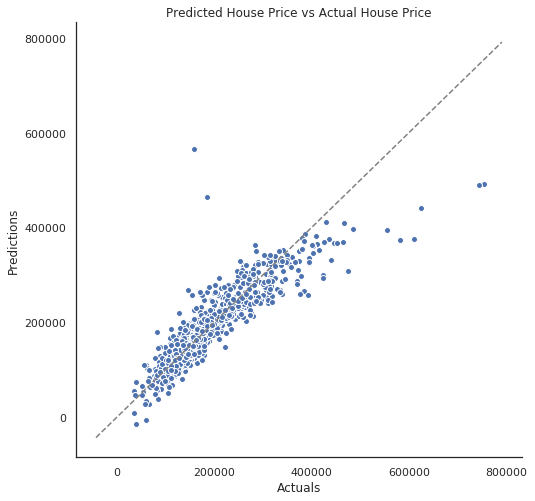

In [47]:
# Create scatter to compare predictions to actual sale prices
## Set style
sns.set(style='white', palette='deep', rc={'figure.figsize':[8, 8]})

## Plot scatterplot for predictions and actual prices
fig, ax = plt.subplots()
ax.scatter(x=housing['SalePrice'], y=housing['predictions'], edgecolor='white')
ax.set_title('Predicted House Price vs Actual House Price')
ax.set_xlabel('Actuals')
ax.set_ylabel('Predictions')

## Plot gray dotted diagonal line (where markers should lie if predictions = actual)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),   # find min limits of figure
    np.max([ax.get_xlim(), ax.get_ylim()])    # find max limits of figure
]
ax.plot(lims, lims, color='0.5', linestyle='--')

## Remove top and right spines
sns.despine()
plt.show()

The scatter plot clearly depicts that the majority of our predictions are very close to the actual `SalePrices` of the houses. However as actual housing prices increase, we become less accurate in our predictions – we can see that we are underpredicting since our predictions are under the gray line.

We can now use our model to predict the prices of houses that the model has not seen. The method is exactly the same as in previous models. See if you can predict the prices of the following houses:

In [48]:
# TASK --- Predict price of new_house1
## Remember, features are ['CentralAir', 'LotArea', 'OverallQual', 'OverallCond',
## '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'Age', 'Neighborhood']

house1 = [[0, 12000, 6, 6, 1200, 500, 3, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
prediction_house1=lr.predict(house1)

prediction_house1[0]

184394.7221987794

In [49]:
# TASK --- Predict price of new_house2

house2 = [[1, 10000, 7, 7, 1500, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
prediction_house2=lr.predict(house2)

prediction_house2[0]

239696.4269338695